## Load Data

In [1]:
import pandas as pd
import numpy as np

original_data = pd.read_excel('2017임산물생산조사.xlsx')
original_data.head(3)

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,서울특별시,종로구,341235.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,36920,3000,110760000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24
2,서울특별시,중구,341243.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,22720,3000,68160000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24


In [2]:
data = original_data.iloc[1:, [1, 3, 5, 7, 10, 12]]
data.rename(columns={'구분(재배/채취)' : '재배채취',
                     '구분(재배/채취).1' : '재배기준',
                     '구분(재배/채취).2' : '재배면적',
                     '구분(재배/채취).3' : '재배단위',
                     'Unnamed: 6' : '환산면적',
                     '품목' : '품목 대분류',
                     '품목.1' : '품목 중분류',
                     '품목.2' : '품목 소분류',
                     '최종값' : '생산량'},
            inplace = True)
data.head()

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
1,종로구,채취,0,㎡,은행,36920
2,중구,채취,0,㎡,은행,22720
3,용산구,채취,0,㎡,은행,41440
4,성동구,채취,0,㎡,은행,9960
5,광진구,채취,0,㎡,은행,12800


In [3]:
data = data[data['품목 소분류'].isin(['밤', '호두', '대추', '떫은감', '건표고', '생표고', '더덕', '오미자'])]
data

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,10,평,더덕,5
203,달성군,재배,150,평,오미자,20
213,달성군,재배,400,평,오미자,15
247,달성군,재배,400,평,오미자,5
285,달성군,재배,40,평,오미자,20
...,...,...,...,...,...,...
106361,서귀포시,재배,246404,봉,생표고,163775
106362,제주시,재배,99500,㎡,떫은감,1464
106363,제주시,재배,297033,봉,건표고,21140
106364,제주시,재배,297033,봉,생표고,47394


In [4]:
data['품목 소분류'].value_counts()

오미자    5610
더덕     2182
생표고     154
대추      140
밤       136
건표고     135
떫은감     129
호두       86
Name: 품목 소분류, dtype: int64

In [5]:
data['재배단위'].value_counts()

평     7477
㎡      620
봉      289
ha     185
Name: 재배단위, dtype: int64

### Cheack NaNs

In [6]:
data.isnull().sum()

시군구/관리소    0
재배채취       0
재배면적       0
재배단위       1
품목 소분류     0
생산량        0
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)
data

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,10,평,더덕,5
203,달성군,재배,150,평,오미자,20
213,달성군,재배,400,평,오미자,15
247,달성군,재배,400,평,오미자,5
285,달성군,재배,40,평,오미자,20
...,...,...,...,...,...,...
106361,서귀포시,재배,246404,봉,생표고,163775
106362,제주시,재배,99500,㎡,떫은감,1464
106363,제주시,재배,297033,봉,건표고,21140
106364,제주시,재배,297033,봉,생표고,47394


# variable preprocessing and Visualization

### 시군구/관리소

In [8]:
data['시군구/관리소'].value_counts()

문경시           1154
장수군            605
무주군            548
단양군            384
거창군            375
              ... 
신안군              1
수성구              1
국립산림품종관리센터       1
강서구              1
대덕구              1
Name: 시군구/관리소, Length: 167, dtype: int64

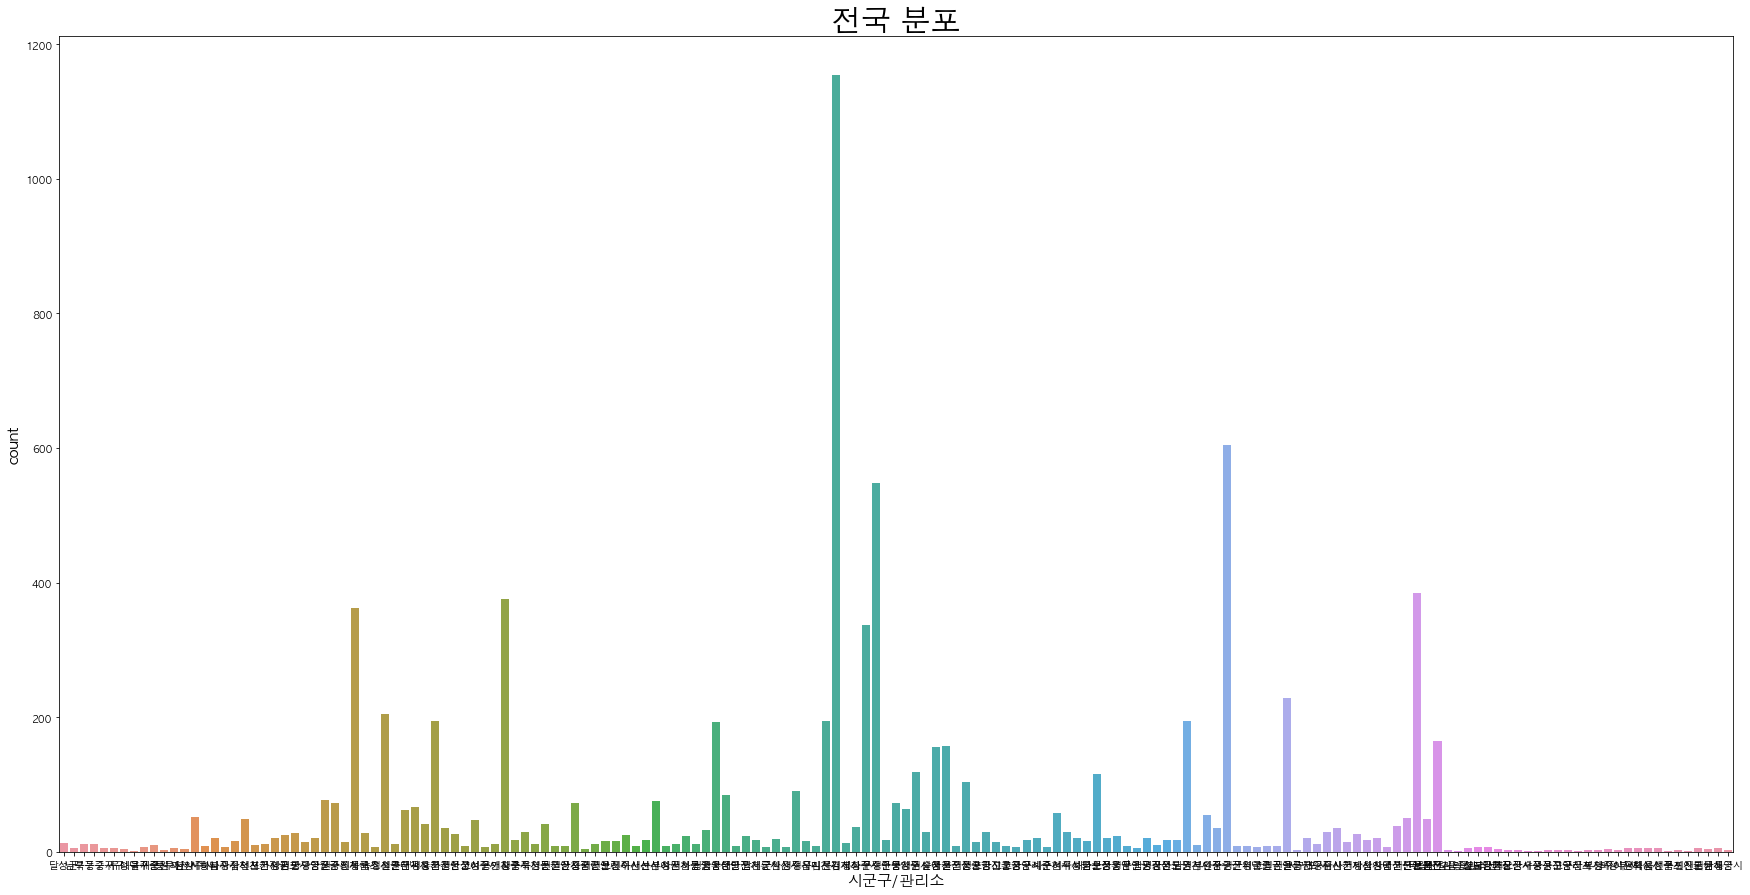

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic' # mac os : AppleGothic
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="시군구/관리소", data=data)
plt.title('전국 분포', fontsize=30)
plt.show()

### 재배채취

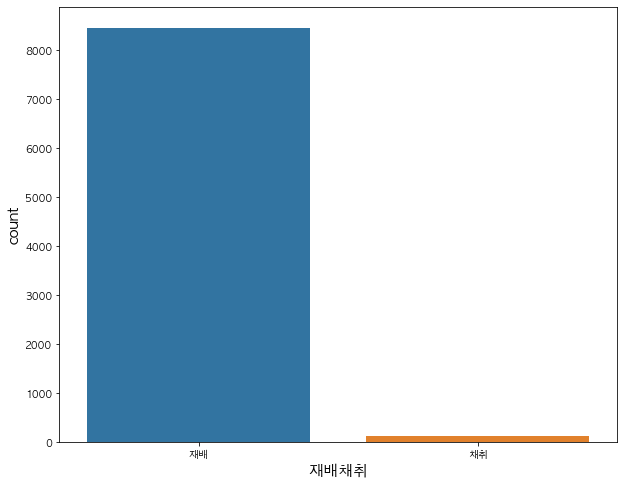

In [10]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배채취", data=data)
plt.show()

### 재배단위

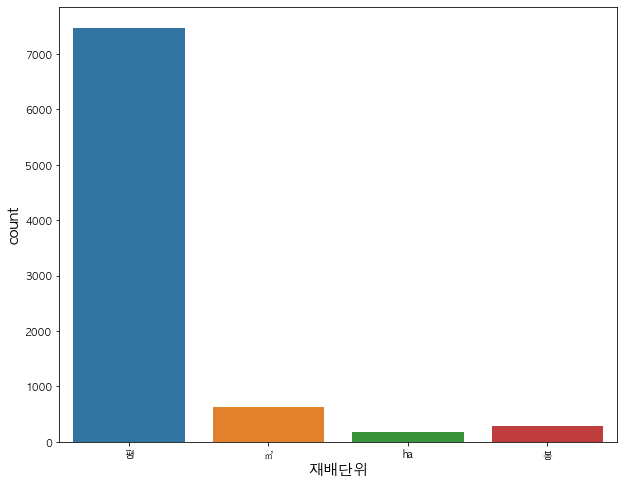

In [11]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배단위", data=data)
plt.show()

### 재배면적

In [12]:
#data.replace({'환산면적': {0 : np.NaN}},
#             inplace=True)
#data.dropna(axis=0, inplace=True)

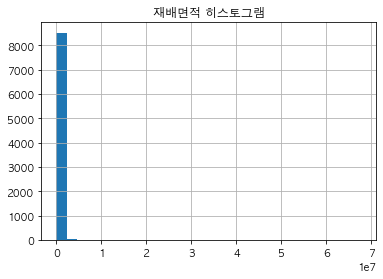

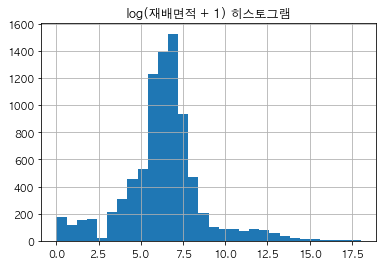

In [13]:
data['재배면적'].hist(bins=30)
plt.title('재배면적 히스토그램')
plt.show()

pd.Series(np.log1p(data['재배면적'].astype(float))).hist(bins=30)
plt.title('log(재배면적 + 1) 히스토그램')
plt.show()

In [14]:
data['재배면적'] = np.log1p(data['재배면적'].astype(float))
data.head()

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,2.397895,평,더덕,5
203,달성군,재배,5.017280,평,오미자,20
213,달성군,재배,5.993961,평,오미자,15
247,달성군,재배,5.993961,평,오미자,5
285,달성군,재배,3.713572,평,오미자,20


### 품목 소분류

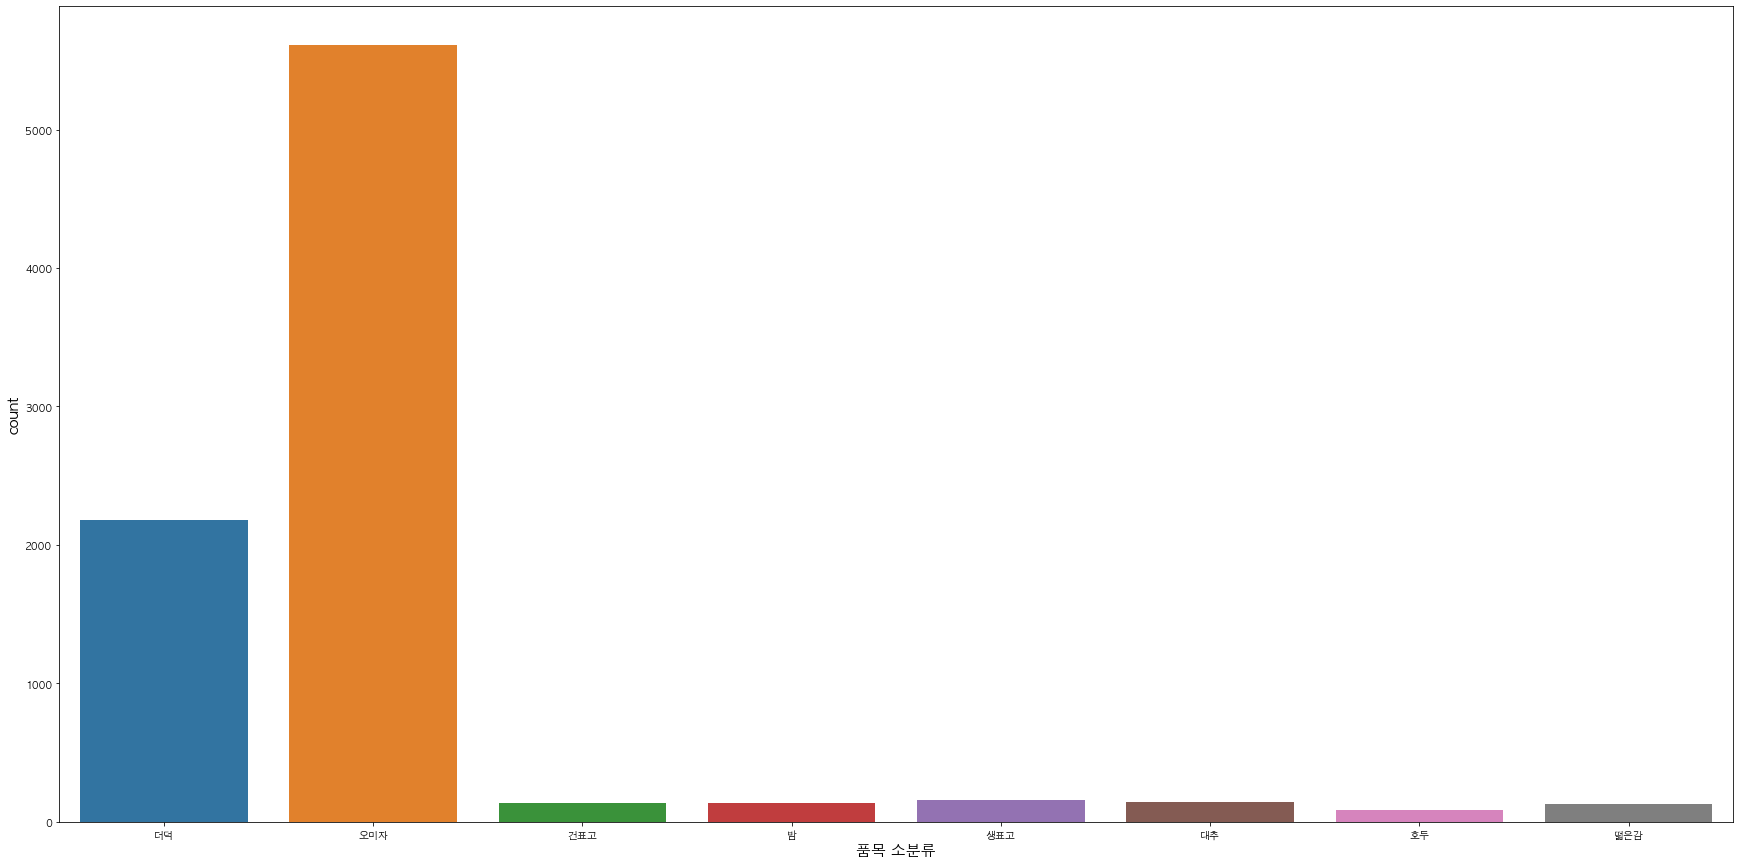

In [15]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 소분류", data=data)
plt.show()

### 생산량

In [16]:
#data.replace({'생산량': {0 : np.NaN}},
#             inplace=True)
#data.dropna(axis=0, inplace=True)

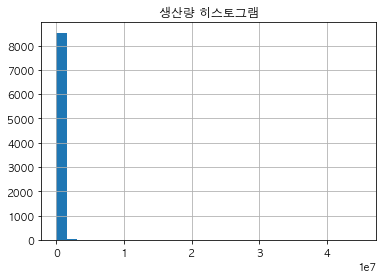

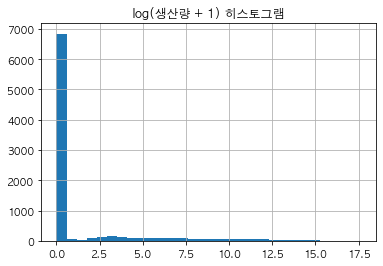

In [17]:
data['생산량'].hist(bins=30)
plt.title('생산량 히스토그램')
plt.show()

pd.Series(np.log1p(data['생산량'].astype(float))).hist(bins=30)
plt.title('log(생산량 + 1) 히스토그램')
plt.show()

In [18]:
data['생산량'] = np.log1p(data['생산량'].astype(float))
data.head()

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,2.397895,평,더덕,1.791759
203,달성군,재배,5.017280,평,오미자,3.044522
213,달성군,재배,5.993961,평,오미자,2.772589
247,달성군,재배,5.993961,평,오미자,1.791759
285,달성군,재배,3.713572,평,오미자,3.044522


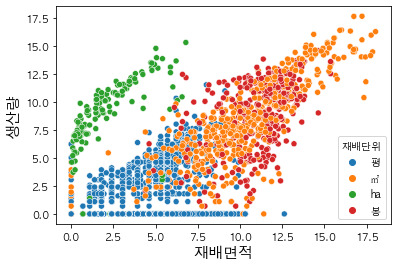

In [19]:
sns.scatterplot(x='재배면적', y='생산량', data=data, hue='재배단위')
plt.show()

## Numerical Variable processing

In [20]:
from sklearn.preprocessing import MinMaxScaler
# column 별로 scaling 되는 것이 아님 주의

X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, ['재배면적']])
X_scaled = X_minmax_scaler.transform(data.loc[:, ['재배면적']])
X_scaled

array([[0.13299905],
       [0.27828299],
       [0.33245455],
       ...,
       [0.69894675],
       [0.69894675],
       [0.33408731]])

In [21]:
y_minmax_scaler = MinMaxScaler()
y_minmax_scaler.fit(data.loc[:, ['생산량']])
y_scaled = y_minmax_scaler.transform(data.loc[:, ['생산량']])
y_scaled

array([[0.10166934],
       [0.17275453],
       [0.15732427],
       ...,
       [0.56509918],
       [0.61090773],
       [0.6424904 ]])

## Categorival variable processing

In [22]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, ['시군구/관리소', '재배채취', '재배단위', '품목 소분류']])
onehot = onehot_encoder.fit_transform(data.loc[:, ['시군구/관리소', '재배채취', '재배단위', '품목 소분류']])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array(['가평군', '강릉시', '강서구', '강진군', '강화군', '거제시', '거창군', '경산시', '경주시',
       '계룡시', '고령군', '고성군', '고양시', '고창군', '고흥군', '곡성군', '공주시', '과천시',
       '광산구', '광양시', '광주시', '괴산군', '구례군', '구리시', '구미시', '국립산림품종관리센터',
       '군산시', '군위군', '군포시', '금산군', '기장군', '김제시', '김천시', '김포시', '김해시',
       '나주시', '남구', '남양주시', '남원시', '남해군', '논산시', '단양군', '달성군', '담양군',
       '당진시', '대덕구', '동구', '동두천시', '동해시', '목포시', '무안군', '무주군', '문경시',
       '밀양시', '보령시', '보성군', '보은군', '봉화군', '부안군', '부여군', '부천시', '북구',
       '사천시', '산청군', '삼척시', '상주시', '서구', '서귀포시', '서산시', '서천군', '성주군',
       '세종시', '속초시', '수성구', '수원시', '순창군', '순천시', '시흥시', '신안군', '아산시',
       '안동시', '안산시', '안성시', '양구군', '양산시', '양양군', '양주시', '양평군', '여수시',
       '여주시', '연천군', '영광군', '영덕군', '영동군', '영암군', '영양군', '영월군', '영주시',
       '영천시', '예산군', '예천군', '오산시', '옥천군', '옹진군', '완도군', '완주군', '용인시',
       '울릉군', '울주군', '울진관리소', '울진군', '원주시', '유성구', '음성군', '의령군', '의성군',
       '의정부시', '이천시', '익산시', '인제군', '임실군', '장성군', '장수군', '장흥군', '전주시',
       '정선군', '정읍

In [23]:
numeric_data_df = pd.DataFrame(X_scaled, columns=['환산면적'])
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,환산면적,0,1,2,3,4,5,6,7,8,...,171,172,173,174,175,176,177,178,179,180
0,0.132999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.278283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.332455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.332455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.205973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566,0.688582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8567,0.638286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8568,0.698947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8569,0.698947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
X_data = np.array(X_data_df)
y_data = y_scaled.reshape(-1,)

print(X_data.shape, y_data.shape)

(8571, 182) (8571,)


# Train Test split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    random_state=1352)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7713, 182) (858, 182)
(7713,) (858,)


# Modeling

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [27]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[0.         0.         0.         0.         0.         0.
 0.13203922 0.         0.         0.        ]


In [28]:
mean_squared_error(y_test, dt_pred)

0.003463146322686181

## RandomForest

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', 
                           random_state = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=1000)

In [30]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[0.         0.00280567 0.         0.         0.         0.
 0.13271091 0.         0.00124454 0.        ]


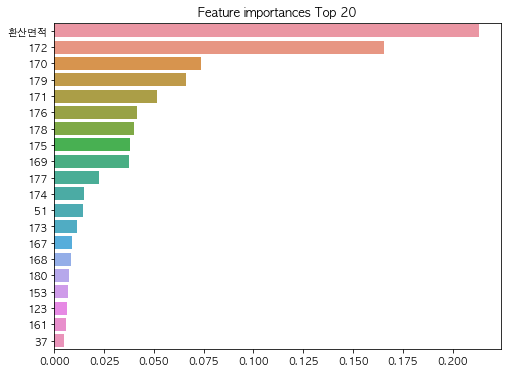

In [31]:
importances_values = rf.feature_importances_
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [32]:
mean_squared_error(y_test, rf_pred)

0.0026711085867396275

## Ridge

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [34]:
print(ridge.score(X_train, y_train))

0.8186161498328774


In [35]:
ridge_pred = ridge.predict(X_test)
mean_squared_error(y_test, ridge_pred)

0.006568716948299432

## LASSO

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [37]:
print(lasso.score(X_train, y_train))

0.7383766079290941


In [38]:
lasso_pred = lasso.predict(X_test)
mean_squared_error(y_test, lasso_pred)

0.008276100314489726

## GBM

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=1000)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[ 0.00078427  0.00135375  0.00080787  0.00080787  0.00080787  0.00213966
  0.13890018 -0.00105877  0.0001464   0.00090843]


In [40]:
mean_squared_error(y_test, gbm_pred)

0.0027671562144252503

## AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.1)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[0.09919617 0.03720506 0.0317259  0.03042477 0.03042477 0.03720506
 0.09919617 0.03720506 0.03720506 0.03720506]


In [42]:
mean_squared_error(y_test, ada_pred)

0.008871723883534403

## XGBoost

In [43]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(learning_rate=0.01, max_depth=15, n_estimators=500)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

[0.02158148 0.00407041 0.00407041 0.00407041 0.00407041 0.00407041
 0.11730497 0.00407041 0.00407041 0.00407041]


In [44]:
mean_squared_error(y_test, xgb_pred)

0.0033590238863986303

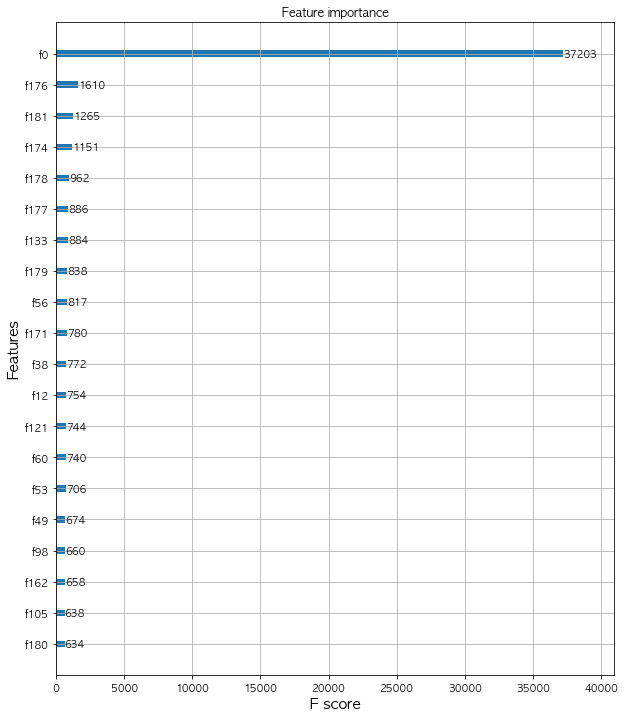

In [45]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [46]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=1000)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

LGBMRegressor(n_estimators=1000)

In [47]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[2.17460500e-03 6.14335954e-03 3.49549402e-04 9.10493805e-04
 4.59137879e-05 7.53217669e-04 1.04358489e-01 1.02944150e-03
 4.83412346e-02 5.64876533e-03]


In [48]:
print(y_test[:10])

[0.         0.         0.         0.         0.         0.
 0.13606314 0.         0.         0.        ]


In [49]:
mean_squared_error(y_test, lgb_pred)

0.0030046783119105805

## Deep Neural Network

In [50]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import functional as F
import tqdm

dX_train, dy_train = torch.tensor(X_train), torch.tensor(y_train)
dX_test, dy_test = torch.tensor(X_test), torch.tensor(y_test)

train_dataset = TensorDataset(dX_train, dy_train)
test_dataset = TensorDataset(dX_test, dy_test)

In [51]:
BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

In [52]:
from model import Model
model = Model(input_size = dX_train.shape[1], hidden_size = 128)

In [53]:
from torch.optim import Adam
from train import Trainer

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)

cpu


Model(
  (dense1): Linear(in_features=182, out_features=128, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (dense2): Linear(in_features=128, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (dense3): Linear(in_features=128, out_features=128, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=128, out_features=1, bias=True)
)

In [54]:
MSE = nn.MSELoss(reduction = 'mean')
trainer = Trainer(model, train_loader, test_loader, criterion = MSE, optimizer = Adam,
                  epochs = 50, lr = 0.0007, l2_norm =0.03, device = device)
trainer.fit()

 46%|████▌     | 28/61 [00:00<00:00, 277.49it/s]

epoch: 1/50, train_loss: 0.03532835, val_loss: 0.01037609


 49%|████▉     | 30/61 [00:00<00:00, 298.20it/s]

epoch: 2/50, train_loss: 0.01500632, val_loss: 0.00755022


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 3/50, train_loss: 0.00974489, val_loss: 0.00627320
epoch: 4/50, train_loss: 0.00795357, val_loss: 0.00592189


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 5/50, train_loss: 0.00684527, val_loss: 0.00562488
epoch: 6/50, train_loss: 0.00616522, val_loss: 0.00512088


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 7/50, train_loss: 0.00550235, val_loss: 0.00559210
epoch: 8/50, train_loss: 0.00549040, val_loss: 0.00517311


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 9/50, train_loss: 0.00496465, val_loss: 0.00493452
epoch: 10/50, train_loss: 0.00451941, val_loss: 0.00469101


 46%|████▌     | 28/61 [00:00<00:00, 276.57it/s]

epoch: 11/50, train_loss: 0.00450329, val_loss: 0.00548232


 48%|████▊     | 29/61 [00:00<00:00, 281.36it/s]

epoch: 12/50, train_loss: 0.00431545, val_loss: 0.00423919


100%|██████████| 61/61 [00:00<00:00, 312.98it/s]

epoch: 13/50, train_loss: 0.00394993, val_loss: 0.00429520



  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 14/50, train_loss: 0.00404941, val_loss: 0.00425357
epoch: 15/50, train_loss: 0.00372455, val_loss: 0.00444523


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 16/50, train_loss: 0.00368340, val_loss: 0.00401653
epoch: 17/50, train_loss: 0.00383131, val_loss: 0.00390016


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 18/50, train_loss: 0.00375363, val_loss: 0.00390534
epoch: 19/50, train_loss: 0.00354023, val_loss: 0.00391237


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 20/50, train_loss: 0.00353018, val_loss: 0.00407089
epoch: 21/50, train_loss: 0.00345978, val_loss: 0.00395560


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 22/50, train_loss: 0.00332205, val_loss: 0.00403293
epoch: 23/50, train_loss: 0.00334634, val_loss: 0.00505833


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 24/50, train_loss: 0.00309721, val_loss: 0.00383206
epoch: 25/50, train_loss: 0.00299058, val_loss: 0.00403735


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 26/50, train_loss: 0.00286967, val_loss: 0.00404988
epoch: 27/50, train_loss: 0.00310160, val_loss: 0.00388877


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 28/50, train_loss: 0.00329068, val_loss: 0.00392138
epoch: 29/50, train_loss: 0.00309552, val_loss: 0.00410043


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 30/50, train_loss: 0.00299487, val_loss: 0.00383523
epoch: 31/50, train_loss: 0.00297594, val_loss: 0.00417526


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 32/50, train_loss: 0.00284465, val_loss: 0.00408164
epoch: 33/50, train_loss: 0.00288943, val_loss: 0.00398128


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 34/50, train_loss: 0.00282221, val_loss: 0.00391751
epoch: 35/50, train_loss: 0.00287917, val_loss: 0.00392606


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 36/50, train_loss: 0.00296636, val_loss: 0.00406522
epoch: 37/50, train_loss: 0.00305700, val_loss: 0.00575760


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 38/50, train_loss: 0.00301490, val_loss: 0.00478685
epoch: 39/50, train_loss: 0.00279759, val_loss: 0.00443512


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 40/50, train_loss: 0.00294241, val_loss: 0.00396482
epoch: 41/50, train_loss: 0.00261376, val_loss: 0.00383666


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 42/50, train_loss: 0.00279454, val_loss: 0.00396573
epoch: 43/50, train_loss: 0.00282727, val_loss: 0.00433244


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 44/50, train_loss: 0.00272202, val_loss: 0.00410549
epoch: 45/50, train_loss: 0.00287262, val_loss: 0.00436460


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 46/50, train_loss: 0.00285384, val_loss: 0.00484600
epoch: 47/50, train_loss: 0.00267926, val_loss: 0.00400383


  0%|          | 0/61 [00:00<?, ?it/s]

epoch: 48/50, train_loss: 0.00250959, val_loss: 0.00459004
epoch: 49/50, train_loss: 0.00263572, val_loss: 0.00453180


100%|██████████| 61/61 [00:00<00:00, 357.77it/s]

epoch: 50/50, train_loss: 0.00254592, val_loss: 0.00432717
best mse : 0.00383206


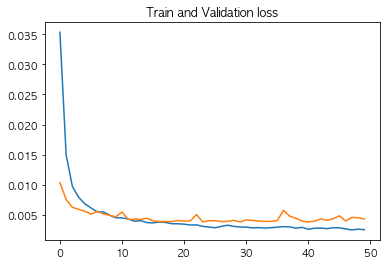

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

history = trainer.history()

plt.plot(history['train_loss'])
plt.plot(history['val_loss'])
plt.title('Train and Validation loss')
plt.show()

In [56]:
trainer.evaluation(test_loader, device)

mse : 0.0038320598735784492


In [57]:
model = trainer.get_best_model()
model.to('cpu')

# model save
torch.save(model.state_dict(), 'model.pt')

# Ensemble

In [58]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
    def predict(self, X_test):
        pred_list = []
        for i, model in enumerate(models.values()):
            if i == 0:
                pred_list.append(model(torch.tensor(X_test.astype(np.float32))).detach().numpy().reshape(-1,))
            else:
                pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)
            
        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for i, model in enumerate(models.values()):
            if i == 0:
                pred_list.append(model(torch.tensor(X_test.astype(np.float32))).detach().numpy().reshape(-1,))
            else:
                pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights, columns=['w1', 'w2', 'w3', 'w4', 'w5', 'w6'])
        result['MSE'] = mse

        return result.sort_values('MSE', ascending=True)

In [59]:
models = {'DNN' : model, 'DecisionTree' : dt, 'RandomForest' : rf, 'GBM' : gbm, 'XGBOOST': xgb_reg, 'LightGBM' : lgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result.head(10)

,w1,w2,w3,w4,w5,w6,MSE
2530,0.201526,0.088085,0.201694,0.202761,0.083012,0.222923,0.002410
19354,0.165190,0.109578,0.162736,0.220987,0.095403,0.246106,0.002410
15725,0.155815,0.121634,0.137713,0.246626,0.092065,0.246148,0.002410
12481,0.203115,0.114920,0.147873,0.207242,0.090497,0.236352,0.002410
20910,0.173258,0.091886,0.201268,0.191095,0.095893,0.246601,0.002411
6695,0.174771,0.109813,0.131111,0.235565,0.100651,0.248089,0.002411
28322,0.161930,0.093673,0.182710,0.234274,0.098463,0.228949,0.002411
4939,0.224269,0.112584,0.122490,0.189524,0.097238,0.253895,0.002412
28650,0.146234,0.089351,0.215319,0.234503,0.092915,0.221678,0.002412
20495,0.186113,0.111688,0.111015,0.244196,0.104336,0.242652,0.002412


In [60]:
optimal_weight = result.iloc[0,:-1].tolist()
print(optimal_weight)

[0.20152553915977478, 0.08808504045009613, 0.20169413089752197, 0.20276054739952087, 0.08301195502281189, 0.22292280197143555]


In [61]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[0.00253925 0.00263233 0.00066897 0.00079467 0.00060512 0.00101978
 0.13389618 0.00039065 0.01145841 0.00183097]


In [62]:
print( y_test[:10])

[0.         0.         0.         0.         0.         0.
 0.13606314 0.         0.         0.        ]


In [63]:
mean_squared_error(y_test, preds)

0.0024100775949926533

# Evaluation

In [64]:
inverse_transformed_pred = np.expm1(preds * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)
inverse_transformed_y_test = np.expm1(y_test * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[4.57665488e-02 4.74835138e-02 1.18593397e-02 1.41032363e-02
 1.07212561e-02 1.81344876e-02 9.58783980e+00 6.90832453e-03
 2.23769827e-01 3.27941813e-02]
[ 0.  0.  0.  0.  0.  0. 10.  0.  0.  0.]


In [65]:
np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred))

1246024.589704391

# Prediction

In [66]:
def predict(model, path):
    test_set = pd.read_excel(path) 
    data = test_set.iloc[1:, [1, 3, 5, 7, 10]]
    data.rename(columns={'구분(재배/채취)' : '재배채취',
                         '구분(재배/채취).1' : '재배기준',
                         '구분(재배/채취).2' : '재배면적',
                         '구분(재배/채취).3' : '재배단위',
                         'Unnamed: 6' : '환산면적',
                         '품목' : '품목 대분류',
                         '품목.1' : '품목 중분류',
                         '품목.2' : '품목 소분류',
                         '최종값' : '생산량'},
                inplace = True)
    
    data['재배면적'] = np.log1p(data['재배면적'].astype(float))
    
    # Normalize
    X_scaled = X_minmax_scaler.transform(data.loc[:, ['재배면적']])
    
    # Categorical variable preprocessing
    onehot = onehot_encoder.transform(data.loc[:, ['시군구/관리소', '재배채취', '재배단위', '품목 소분류']])
    
    numeric_data_df = pd.DataFrame(X_scaled, columns=['재배면적'])
    onehot_data_df = pd.DataFrame(onehot.toarray())

    X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
    X_data = np.array(X_data_df)
    
    y_pred = model.predict(X_data)
    inverse_transformed_pred = np.expm1(y_pred * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)
    
    return inverse_transformed_pred

In [67]:
path = 'test_set.xlsx'

In [68]:
test_set = pd.read_excel(path) 
test_set

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,부산광역시,기장군,NaN,재배,NaN,118800,0,㎡,수실,재배수실,밤,kg,7334,980,7187320,NaN,NaN,NaN,NaN,NaN
2,대구광역시,달성군,NaN,재배,NaN,33375,0,㎡,수실,재배수실,밤,kg,194,2853.34,553547,NaN,NaN,NaN,NaN,NaN
3,대구광역시,동구,NaN,재배,NaN,42900,0,㎡,수실,재배수실,밤,kg,8559,2538.46,21726692,NaN,NaN,NaN,NaN,NaN
4,인천광역시,강화군,NaN,재배,NaN,23100,0,㎡,수실,재배수실,밤,kg,7693,3500,26925500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,경상남도,산청군,NaN,재배,NaN,238336,0,㎡,수실,재배수실,호두,kg,17948,19273.3,345917245,NaN,NaN,NaN,NaN,NaN
219,경상남도,의령군,NaN,재배,NaN,1650,0,㎡,수실,재배수실,호두,kg,150,16006.5,2400970,NaN,NaN,NaN,NaN,NaN
220,경상남도,창녕군,NaN,재배,NaN,89600,0,㎡,수실,재배수실,호두,kg,21,10204.1,214286,NaN,NaN,NaN,NaN,NaN
221,경상남도,함양군,NaN,재배,NaN,469992,0,㎡,수실,재배수실,호두,kg,9405,14335.8,134827786,NaN,NaN,NaN,NaN,NaN


In [69]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)
preds = predict(ensemble, path)
print(preds[:10])

[  8190.77363047    616.80541465   5923.39006673   4592.59016784
   2811.60459873   3221.71228144    546.38860984   4968.05999743
 352233.76786174  30944.17470413]


In [70]:
result = pd.concat([test_set.loc[1:, '최종값'].reset_index(drop=True), pd.Series(preds, name='예측값')], axis=1)
result[:30]

,최종값,예측값
0,7334,8190.773630
1,194,616.805415
2,8559,5923.390067
3,7693,4592.590168
4,1344,2811.604599
5,3140,3221.712281
6,455,546.388610
7,5831,4968.059997
8,685213,352233.767862
9,15531,30944.174704
